In [289]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
sns.set()
sns.set_context('notebook')
sns.set_style('ticks')
sns.set_palette('Set2')
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
plt.rcParams["figure.figsize"] = [12, 9]

In [292]:
fn = 'test.csv'
D = ['D' + str(i) for i in range(10)] + ['Dmean']
columns = ['Tribe', 'Eval', 'fitness', 'sigma', 'var_max', 'dist_to_parent']
plot_names = ['$\text{max Fitness in }g_i$', '$\sigma$', '$Var(D_{ii})$', '$|mean - mean_p|$']
df = pd.read_csv(fn, names=columns + D, skipfooter=2, engine='python')

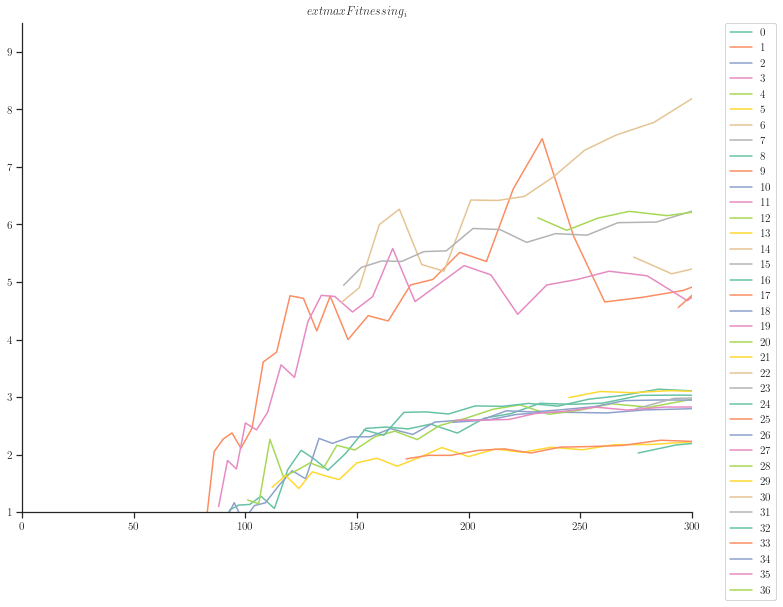

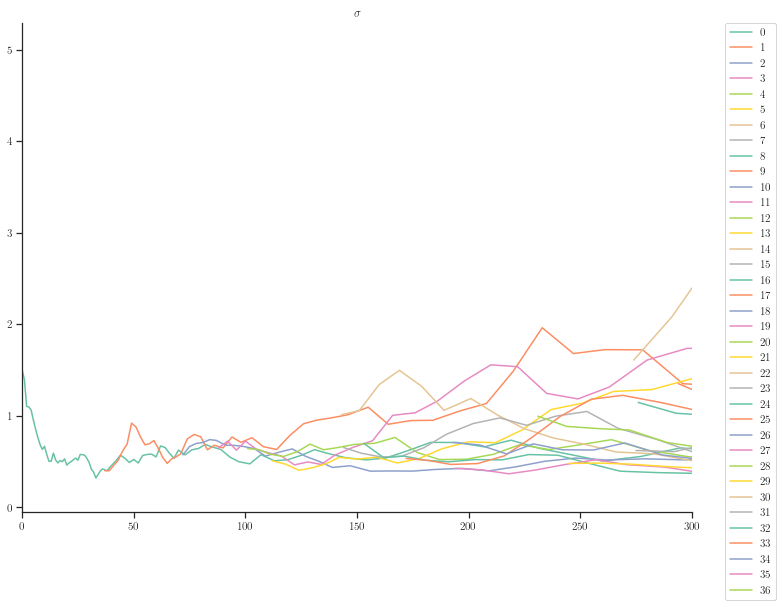

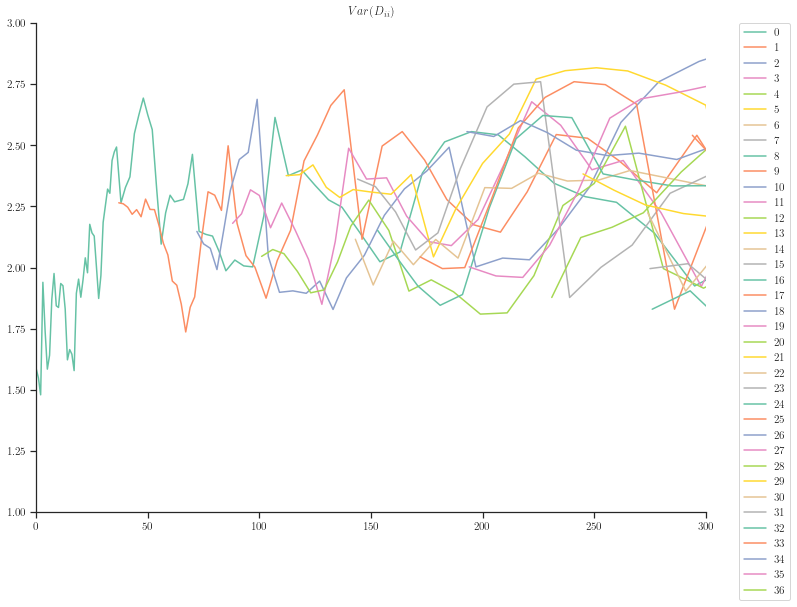

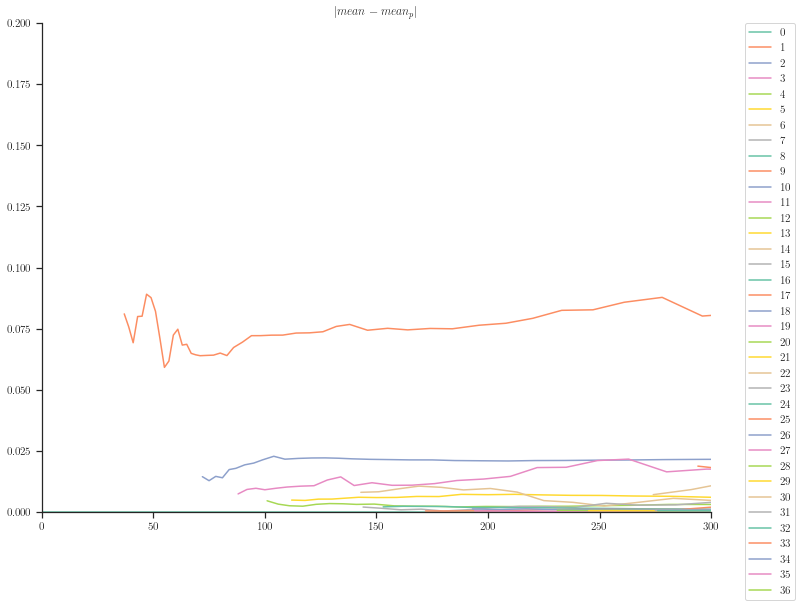

In [293]:
for idx, column in enumerate(columns[2:]):
    fig = plt.figure()
    ax = plt.gca()    
    if column == 'var_max':
        ax.set_ylim([1,3])
    elif column == 'fitness':
        ax.set_ylim([1,9.5])
    elif column == 'dist_to_parent':
        ax.set_ylim([0,.2])
    ax.set_xlim([0,300])
    #ax.set_yscale('log')
    df.groupby('Tribe')[column].plot(title=plot_names[idx], ax=ax)
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    sns.despine()

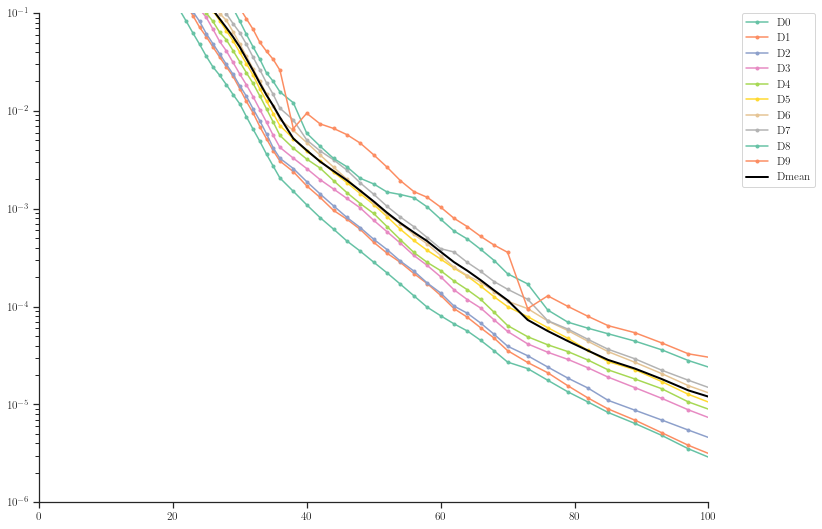

In [294]:
fig = plt.figure()
t = 0
for d in D:
    ax = plt.gca()
    ax.set_yscale('log')
    ax.set_xlim([0,100])
    ax.set_ylim([1e-6, 1e-1])
    if d == 'Dmean':
        df[df.Tribe==t][d].plot(ax=ax, c='black', lw=2)
    else:
        df[df.Tribe==t][d].plot(marker='.', ax=ax)
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    sns.despine()